Example MAB for reference on working MAB algo. Annotated for ease of study and reference for those looking at details of building a basic MAB model (requires some coding knowledge but provides a powerful model)

In [1]:
"""
MAB or the multi armed bandit allows for models to make bayesian optimizations across 
discrete categories with each category having its own reward profile. The problem originates
from the concept of slot machines, where there are many arms to pull but you can only pull 
one at a time. This model solves the questions of which arm to pull to maximize profit, when 
there is incomplete information about how much reward pulling each arm nets. 

The development here focuses on building this model for biological purposes where continuous
and categorical variables cause curse of dimensionality problems when solving for problems where
experiments must be conducted to determine the best combination of continous and categorical 
variables to maximize a reward. 
"""
import numpy as np # for the math
import matplotlib.pyplot as plt # for plotting

class MultiArmedBandit: # creates class and define how the model behaves, selects arms, calculates rewards and updates estiates

    # initialize model (self) with 'k' arms, and 'true_means' expected reward at each arm
    def __init__(self, k, true_means): 
        self.k = k # Number of arms (k)
        self.true_means = true_means # True expected rewards of each arm
        self.estimates = np.zeros(k) # this is estimated reward of each arm (initialized as 0s)
        self.arm_counts = np.zeros(k) # this is how many times each arm has been chosen/drawn/used (also initialized as 0s)

    # simulation/ estimate of reward
    def get_reward(self, arm): 
        # For this model when an arm is chosen, the model returns a sample derived from a normal distribution centered at true_means with standardeviation of "1"ArithmeticError
        return np.random.normal(self.true_means[arm], 1)
    
    # the UCB (upper confidence bound (type of Bayesian Optimization algorithm)) is used here to select arms that haven't had many pulls (exploration) and selecting arms with highest estimated reward)
    def select_arm(self, t):
        #UCB looks at estimates across arms and maximises the reward while also boosting arms with few pulls to diminish uncertainty before maximising.
        ucb_values = self.estimates + np.sqrt(2*np.log(t+1)/(self.arm_counts+1e-5)) # 1e-5 is an arbitrary number to prevent dividing by 0                                     
        return np.argmax(ucb_values) # Select the arm with the highest UCB value

    # method updates estimates for selected arm based on new reward received
    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1 # increases count on pulled arm
        n = self.arm_counts[arm] # calculates the number of pulls of selected arm
        self.estimates[arm] += (reward - self.estimates[arm])/n  # estimate is adjusted to converge towards true mean over time/draws

# Now we need a method that will simulate the above class
def simulate_bandit(k, true_means, iterations): #this is where number of arms and true means/rewards are first input
    bandit = MultiArmedBandit(k, true_means) # setup class
    rewards = np.zeros(iterations) # setup rewards across iterations t as 0s to start (model has no information) Rewards can be modified here if available
    for t in range(1, iterations +1): # set range between 1 and number of iterations
        arm = bandit.select_arm(t) # use UCB to select an arm
        reward = bandit.get_reward(arm) # find reward for given arm in current simulation step t (iteration)
        bandit.update_estimates(arm, reward) # update estaimtes for the arm given new reward value
        rewards[t-1] = reward # update rewards
    return rewards, bandit.estimates # returns the rewards across arms, as well as bandit estimates across each arm



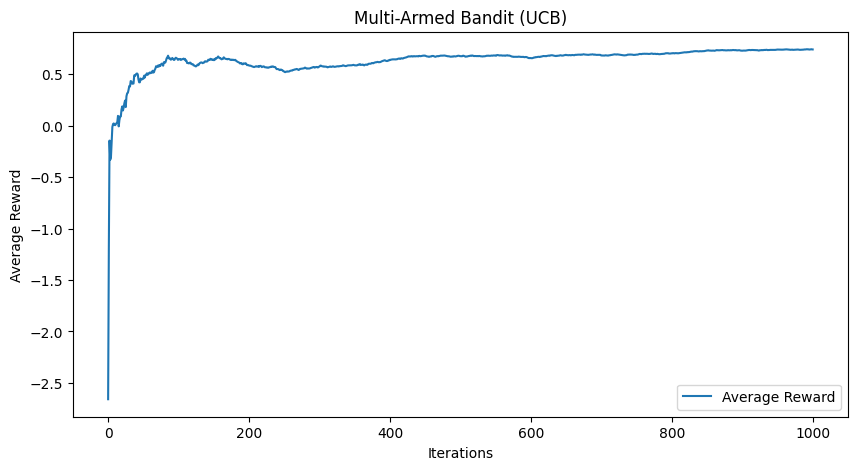

True Means:  [-0.7568905   0.24749061  0.63256734 -0.05601081  0.53115671  0.43167442
  0.87587174 -0.45222276  0.57787324 -0.6152895 ]
Estimated Means after simulation:  [-1.59195454  0.13114843  0.57772088  0.12374162  0.66677854  0.4913812
  0.881068   -0.32690152  0.6447613  -0.32500378]


In [3]:


def main():
    k = 10  # Number of arms
    true_means = np.random.normal(0, 1, k)  # True mean reward for each arm
    iterations = 1000  # Number of rounds to simulate

    rewards, estimated_means = simulate_bandit(k, true_means, iterations)

    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / (np.arange(iterations) + 1)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(average_rewards, label='Average Reward')
    plt.title('Multi-Armed Bandit (UCB)')
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.show()

    print("True Means: ", true_means)
    print("Estimated Means after simulation: ", estimated_means)

if __name__ == "__main__":
    main()


UCB Algorithm: The core of the Upper Confidence Bound (UCB) is that for each arm, we compute a confidence bound on its mean based on how many times it has been selected. The algorithm then selects the arm with the highest upper bound, balancing the exploration of arms with fewer pulls (higher uncertainty) and exploiting arms that are known to give high rewards.
The formula used for UCB is:

UCB(subt)(a) = avgu(suba) + sqrt(2logt/N(suba)(t))

where:
avgu(suba) is the estimated mean of arm 
​	
 N(suba)(t) is the number of times arm a has been pulled,

t is the current time step (iteration).

This formula ensures that the arms with higher uncertainty (less pulls) are given a chance to be explored, while arms that have been pulled many times are exploited more often.
Simulation: The simulation runs for iterations number of steps, and in each step, the algorithm selects the arm using the UCB strategy, receives a reward, and updates the estimated mean for that arm.
Plot: After the simulation, we plot the average reward over time to observe how the agent's performance improves as it explores and exploits the arms.
Expected Output:
True Means: The true average reward for each arm (not known to the algorithm during the run).
Estimated Means: The final estimates of the means after the simulation.
Plot: A graph showing how the average reward evolves over time, with the goal of the agent getting closer to the optimal solution (maximizing the reward).
This UCB approach tends to perform well in scenarios where the rewards of the arms have different levels of uncertainty, and it efficiently balances exploration and exploitation.

Below is an example of UCB algorithm in MAB from geeksforgeeks.org

In [12]:
class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Example usage

n_arms = 19
n_trials = 1000
rewards = np.random.randn(n_arms, n_trials)
total_reward = 0

agent = UCB(n_arms)


for t in range(n_trials):
    arm = agent.select_arm()
    reward = rewards[arm, t]
    agent.update(arm, reward)
    total_reward += reward

print("Total Reward:", total_reward)

Total Reward: -33.79189601824662
